# Image Augmentation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen=ImageDataGenerator(rescale=1/255)

In [26]:
x_train=train_datagen.flow_from_directory(r'D:\SmartInternz Externship\CNN_Dataset\CNN_Dataset\Training',target_size=(64,64),
                                         class_mode='categorical',batch_size=100)

Found 1238 images belonging to 4 classes.


In [5]:
len(x_train)

39

In [27]:
x_test=test_datagen.flow_from_directory(r'D:\SmartInternz Externship\CNN_Dataset\CNN_Dataset\Testing',target_size=(64,64),
                                         class_mode='categorical',batch_size=100)

Found 326 images belonging to 4 classes.


In [7]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

# Import Libraries

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

# Create the Model

In [13]:
model=Sequential()

# Add Layers

In [14]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(300,activation='relu'))

In [18]:
model.add(Dense(150,activation='relu'))

In [21]:
model.add(Dense(4,activation='softmax'))

# Compile the model

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fit the model

In [28]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
13/13 [==============================] - 14s 1s/step - loss: 0.2215 - accuracy: 0.9225 - val_loss: 0.1625 - val_accuracy: 0.9509
Epoch 2/10
13/13 [==============================] - 13s 1s/step - loss: 0.2082 - accuracy: 0.9241 - val_loss: 0.2176 - val_accuracy: 0.9294
Epoch 3/10
13/13 [==============================] - 13s 981ms/step - loss: 0.1949 - accuracy: 0.9321 - val_loss: 0.1508 - val_accuracy: 0.9448
Epoch 4/10
13/13 [==============================] - 13s 1s/step - loss: 0.1800 - accuracy: 0.9378 - val_loss: 0.1363 - val_accuracy: 0.9571
Epoch 5/10
13/13 [==============================] - 13s 1s/step - loss: 0.1588 - accuracy: 0.9418 - val_loss: 0.1135 - val_accuracy: 0.9693
Epoch 6/10
13/13 [==============================] - 13s 969ms/step - loss: 0.1541 - accuracy: 0.9483 - val_loss: 0.0685 - val_accuracy: 0.9847
Epoch 7/10
13/13 [==============================] - 13s 1s/step - loss: 0.1346 - accuracy: 0.9580 - val_loss: 0.0720 - val_accuracy: 0.9755
Epoch 8/10
13/

# Save the Model

In [29]:
model.save('animal.h5')

# Testing the CNN Model

In [31]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
model=load_model('animal.h5')
img=image.load_img(r'D:\SmartInternz Externship\CNN_Dataset\CNN_Dataset\Testing\bears\k4 (75).jpg',target_size=(64,64))

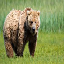

In [33]:
img

In [34]:
x=image.img_to_array(img)

In [35]:
x

array([[[117., 139.,  90.],
        [117., 140.,  88.],
        [113., 136.,  82.],
        ...,
        [140., 159., 103.],
        [139., 158., 103.],
        [145., 168., 116.]],

       [[118., 140.,  91.],
        [119., 142.,  90.],
        [109., 132.,  78.],
        ...,
        [140., 159., 103.],
        [132., 151.,  96.],
        [141., 164., 110.]],

       [[121., 144.,  92.],
        [121., 144.,  90.],
        [102., 125.,  69.],
        ...,
        [150., 170., 111.],
        [132., 151.,  95.],
        [147., 170., 114.]],

       ...,

       [[121., 140.,  59.],
        [121., 140.,  59.],
        [119., 138.,  57.],
        ...,
        [137., 159.,  74.],
        [146., 166.,  79.],
        [144., 160.,  72.]],

       [[120., 138.,  56.],
        [123., 141.,  59.],
        [126., 144.,  62.],
        ...,
        [139., 160.,  67.],
        [143., 163.,  68.],
        [151., 166.,  71.]],

       [[131., 149.,  67.],
        [138., 156.,  74.],
        [131., 1

In [36]:
x.ndim

3

In [37]:
x=np.expand_dims(x,axis=0)

In [38]:
x

array([[[[117., 139.,  90.],
         [117., 140.,  88.],
         [113., 136.,  82.],
         ...,
         [140., 159., 103.],
         [139., 158., 103.],
         [145., 168., 116.]],

        [[118., 140.,  91.],
         [119., 142.,  90.],
         [109., 132.,  78.],
         ...,
         [140., 159., 103.],
         [132., 151.,  96.],
         [141., 164., 110.]],

        [[121., 144.,  92.],
         [121., 144.,  90.],
         [102., 125.,  69.],
         ...,
         [150., 170., 111.],
         [132., 151.,  95.],
         [147., 170., 114.]],

        ...,

        [[121., 140.,  59.],
         [121., 140.,  59.],
         [119., 138.,  57.],
         ...,
         [137., 159.,  74.],
         [146., 166.,  79.],
         [144., 160.,  72.]],

        [[120., 138.,  56.],
         [123., 141.,  59.],
         [126., 144.,  62.],
         ...,
         [139., 160.,  67.],
         [143., 163.,  68.],
         [151., 166.,  71.]],

        [[131., 149.,  67.],
       

In [39]:
x.ndim

4

In [50]:
pred=model.predict_classes(x)

In [44]:
pred

array([0], dtype=int64)

In [55]:
bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3

SyntaxError: invalid syntax (Temp/ipykernel_19972/874679997.py, line 1)

In [54]:
index=['bears','crows','elephants','rats']
print(index[pred[0]])

bears


# CNN Video Analysis

In [ ]:
import cv2

In [ ]:
img=cv2.imread(r'D:\SmartInternz Externship\CNN_Dataset\CNN_Dataset\Testing\bears\k4 (75).jpg',1)

In [ ]:
img

In [ ]:
img1=cv2.imread(r'D:\SmartInternz Externship\CNN_Dataset\CNN_Dataset\Testing\bears\k4 (75).jpg',0)

In [ ]:
img1

In [ ]:
print(img.shape)

In [ ]:
img=cv2.imread(r'D:\SmartInternz Externship\CNN_Dataset\CNN_Dataset\Testing\bears\k4 (75).jpg',1)
cv2.imshow('image',img)
cv2.waitkey(0)
cv2.destroyAllWindows()

# CNN Video Analysis

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('animal.h5')
video=cv2.VideoCapture(0)
index=['bears','crows','elephants','rats']
while 1:
    succes,frame=video.read()
    cv2.imwrite('image.jpg'.frame)
    img-image.load_img('image.jpg',target_size=(64,64))
    x=image.img_ti_array(img)
    x=np.expand_dims(x,axis=0)
    pred=model.predict_classes(x)
    y=pred[0]
    cv2.putText(frame,'The Predcted Animal is: '+str(index[y]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4)
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()